# Create T2K Wells

In [2]:
0x1F

31

In [143]:
def scale(x,mid,factor):
    x -= mid
    x *= factor
    x += mid
    return x

def getCentre(xs,ys):
    x_mid = int((max(xs) + min(xs))/2)
    y_mid = int((max(ys) + min(ys))/2)
    return (x_mid,y_mid)

In [309]:
from pylab import *
from well_graphs import create3DVertices,makeFullGraph,create2DVertices
import math

def to_tempest_bytes(vs,nm,open_closed):
    xs = [(vs[i]) for i in range(0,len(vs),2)]
    ys = [(vs[i]) for i in range(1,len(vs),2)]

    lxs = len(xs)
    if lxs < 16:
        print(nm,lxs)
        plt.scatter(xs,ys)
        show()

    # Make sure we're starting from at least origin 10 on both axes
    min_x = min(xs)
    if min_x < 0:
        xs = [x + abs(min_x) + 10 for x in xs]

    min_y = min(ys)
    if min_y < 0:
        ys = [y + abs(min_y) + 10 for y in ys]

    # Invert the Y values so oriented correctly.
    # NOTE: the arrays must run clockwise for the claw to be
    # oriented correctly!
    max_y = max(ys)
    ys = [max_y - y for y in ys]

    # Get the centre of the figure
    centre_x,centre_y = getCentre(xs,ys)
    # Centre of 255x255 figure
    screen_centre_x = 128
    screen_centre_y = 128
    # Move the figure to the centre of a 255x255 canvas
    x_offset = screen_centre_x - centre_x
    y_offset = screen_centre_y - centre_y
    xs = [x + x_offset for x in xs]
    ys = [y + y_offset for y in ys]
    
    
    # Scale up if required
    x_dim = max(xs) - min(xs)
    y_dim = max(ys) - min(ys)
    max_dim = max([x_dim,y_dim])
    scale_dim = math.floor((0xF0 / max_dim))
    xs = [scale(x,screen_centre_x,scale_dim) for x in xs]
    ys = [scale(y,screen_centre_y,scale_dim) for y in ys]


    # Truncate if necessary
    if lxs > 16:
        xs = xs[:16]
        ys = ys[:16]
        
    # In order for the claw to orient correctly we need to order the arrays
    # so that we start with the highest x value.
    #if open_closed:
    #    ih = xs.index(max(xs))
    #    xs = xs[ih:] + xs[:ih]
    #    ys = ys[ih:] + ys[:ih]
    #else:
    #    xs = list(reversed(xs))
    #    ys = list(reversed(ys))
        
    # Our origin is zero on the bottom left, maximum x and y values are 255
    #print(nm)
    #plt.scatter(xs,ys)
    #show()

    # '0BA' is the notation for a value of 0xBA. Anything of 0x80 or above gets
    # this leading zero to indicate that it is a two's complement value(?).
    return (".BYTE "+ ','.join([f"{x:02x}" if x < 129 else f"{x:03x}" for x in xs]),
            ".BYTE "+ ','.join([f"{x:02x}" if x < 129 else f"{x:03x}" for x in ys]))



Extract the t2k web data into a list

In [291]:
web_name = ""
web_data = ""
t2k_webs = []
lines = open("webs.s",'r').readlines()
for ln in lines:
    if ":" in ln and web_name:
        xs = [int(x) for x in ','.join([x for x in web_data.split() if ',' in x]).split(',')]
        t2k_webs += [(web_name,xs[:-3],xs[-1])]
        web_data = ""
        web_name = ""
    if ";" in ln:
        web_name = ln.split(';')[-1].strip()
    if ":" in ln:
        continue
    web_data += ln
xs = [int(x) for x in ','.join([x for x in web_data.split() if ',' in x]).split(',')]
t2k_webs += [(web_name,xs[:-3],xs[-1])]
len(t2k_webs)

37

In [310]:
x_bytes = []
y_bytes = []
open_or_closed = []
for nm,vs,open_closed in t2k_webs:
    xs,ys = to_tempest_bytes(vs,nm,open_closed)
    x_bytes += [xs + " ; " + nm]
    y_bytes += [ys + " ; " + nm]
    open_or_closed +=  [("0" if open_closed else "-1") + " ; " + nm]


Get the web order as in t2k.

In [311]:
web_order = [
"web5","web11","web1","web2","web9","web3","web12","web7",
"web13","web4","web14","web10","web15","web6","web16","web8",
"web18","web19",
"web20","web4","web14","web10","web17","web6","web16","web22",
"web24","web23","web27","web25","web21","web28","web29","web30",
"web32","web33","web34","web35","web36","web37","web26","web31"
]
webs = [int(x[3:])-1 for x in web_order]

print("NEWLIX:")
for i in webs:
    print(x_bytes[i])

print()
print("NEWLIZ:")
for i in webs:
    print(y_bytes[i])

print()
print("HOLRAP:")
for i in webs:
    print(".BYTE " + open_or_closed[i])



NEWLIX:
.BYTE 6c,44,1c,08,08,1c,44,6c,094,0bc,0e4,0f8,0f8,0e4,0bc,094 ; circle
.BYTE 08,08,08,08,08,44,80,0bc,0f8,0f8,0f8,0f8,0f8,0bc,80,44 ; square
.BYTE 08,18,28,38,48,58,68,78,088,098,0a8,0b8,0c8,0d8,0e8,0f8 ; flat plane
.BYTE 08,17,26,35,44,53,62,71,08f,09e,0ad,0bc,0cb,0da,0e9,0f8 ; v
.BYTE 80,6c,58,44,30,1c,08,30,58,80,0a8,0d0,0f8,0e4,0bc,094 ; triangle
.BYTE 08,08,08,08,17,35,53,71,08f,0ad,0cb,0e9,0f8,0f8,0f8,0f8 ; u
.BYTE 08,1c,30,44,58,62,6c,76,80,08a,094,0a8,0bc,0d0,0e4,0f8 ; w
.BYTE 6f,4d,2b,09,09,2b,4d,6f,091,0b3,0d5,0f7,0f7,0d5,0b3,091 ; dumb-bell
.BYTE 12,12,1c,30,44,58,6c,80,094,0a8,0bc,0d0,0e4,0ee,0ee,0ee ; sine wave
.BYTE 80,62,26,08,44,08,26,62,80,09e,0da,0f8,0bc,0f8,0da,09e ; clover
.BYTE 12,1c,26,30,3a,4e,62,76,08a,09e,0a8,0b2,0bc,0c6,0da,0ee ; parabola
.BYTE 68,68,38,08,08,38,68,68,098,098,0c8,0f8,0f8,0c8,098,098 ; cross
.BYTE 80,58,30,08,1c,44,6c,80,094,0a8,0bc,0d0,0e4,0f8,0d0,0a8 ; arrowhead
.BYTE 0b,18,25,32,3f,4c,59,73,80,08d,0a7,0b4,0c1,0ce,0db,0e8 ; distorted 

# Scratchpad

In [ ]:
vs = [-3,4,-4,6,-4,8,-3,10,-1,11,1,11,3,10,2,12,2,14,3,16,5,17,7,17,9,16,9,16,9,16,9,16]
print(to_tempest_bytes(vs,70,10))

vs = [-1,16,-3,15,-3,13,-3,11,-1,9,1,8,3,7,5,6,7,4,8,2,9,0,10,-2,12,-3,14,-3,14,-3,-1,-16]
print(to_tempest_bytes(vs,40,10))
len(vs)


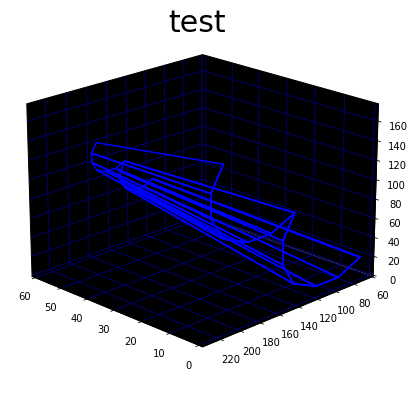

In [50]:
# Show in a graph
vertices = list(zip(xs,ys))
x,y,z = create3DVertices(vertices,-1)
makeFullGraph(x,y,z, f"test.png", "test")
